In [425]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [426]:
# Dataset creation

np.random.seed(42)

rows = 2000  # per class → total = 6000

def create_data(skill, exp, score, hours, courses):
    return pd.DataFrame({
        "Age": np.random.randint(18, 60, rows),
        "Experience_Years": np.random.uniform(exp[0], exp[1], rows).round(1),
        "Average_Score": np.random.randint(score[0], score[1], rows),
        "Time_Spent_Hours": np.random.randint(hours[0], hours[1], rows),
        "Completed_Courses": np.random.randint(courses[0], courses[1], rows),
        "Education_Level": np.random.choice(["UG", "PG", "PhD"], rows, p=[0.5, 0.4, 0.1]),
        "Interest_Domain": np.random.choice(["AI", "Web Development", "Data Science"], rows),
        "Gender": np.random.choice(["Male", "Female", None], rows, p=[0.45, 0.45, 0.10]),
        "Preferred_Mode": np.random.choice(["Online", "Offline", "Hybrid"], rows),
        "Skill_Level": skill
    })

df = pd.concat([
    create_data("Beginner", (0, 1.5), (40, 70), (2, 12), (0, 4)),
    create_data("Intermediate", (0.8, 4), (60, 88), (6, 25), (2, 8)),
    create_data("Advanced", (2.5, 8), (75, 100), (12, 40), (6, 15))
])

df.reset_index(drop=True, inplace=True)

#  NULL values 
null_idx = np.random.choice(df.index, 50, replace=False)
df.loc[null_idx, "Completed_Courses"] = np.nan

#Outlier creation
outlier_idx = np.random.choice(len(df), 25, replace=False)
df.iloc[outlier_idx, df.columns.get_loc("Time_Spent_Hours")] = np.random.randint(80, 120, 25)
df


,Age,Experience_Years,Average_Score,Time_Spent_Hours,Completed_Courses,Education_Level,Interest_Domain,Gender,Preferred_Mode,Skill_Level
0,56,1.0,56,4,3.0,UG,Web Development,Female,Offline,Beginner
1,46,0.3,43,7,3.0,PG,Web Development,Female,Hybrid,Beginner
2,32,0.8,68,5,1.0,PG,Data Science,Female,Online,Beginner
3,25,1.1,52,8,2.0,PG,Web Development,Female,Offline,Beginner
4,38,0.2,43,4,0.0,UG,AI,Female,Online,Beginner
...,...,...,...,...,...,...,...,...,...,...
5995,32,7.9,79,38,6.0,UG,AI,Male,Offline,Advanced
5996,48,3.8,78,15,12.0,PG,AI,None,Offline,Advanced
5997,24,7.8,76,21,10.0,UG,AI,Male,Offline,Advanced
5998,47,5.3,95,37,10.0,PG,AI,Female,Hybrid,Advanced


In [427]:
df["Skill_Level"].value_counts()


Skill_Level
Beginner        2000
Intermediate    2000
Advanced        2000
Name: count, dtype: int64

In [428]:
df.shape

(6000, 10)

In [429]:
df.head()

,Age,Experience_Years,Average_Score,Time_Spent_Hours,Completed_Courses,Education_Level,Interest_Domain,Gender,Preferred_Mode,Skill_Level
0,56,1.0,56,4,3.0,UG,Web Development,Female,Offline,Beginner
1,46,0.3,43,7,3.0,PG,Web Development,Female,Hybrid,Beginner
2,32,0.8,68,5,1.0,PG,Data Science,Female,Online,Beginner
3,25,1.1,52,8,2.0,PG,Web Development,Female,Offline,Beginner
4,38,0.2,43,4,0.0,UG,AI,Female,Online,Beginner


In [430]:
df.tail()

,Age,Experience_Years,Average_Score,Time_Spent_Hours,Completed_Courses,Education_Level,Interest_Domain,Gender,Preferred_Mode,Skill_Level
5995,32,7.9,79,38,6.0,UG,AI,Male,Offline,Advanced
5996,48,3.8,78,15,12.0,PG,AI,None,Offline,Advanced
5997,24,7.8,76,21,10.0,UG,AI,Male,Offline,Advanced
5998,47,5.3,95,37,10.0,PG,AI,Female,Hybrid,Advanced
5999,53,3.3,83,30,13.0,PhD,AI,Male,Hybrid,Advanced


In [431]:
df.dtypes

Age                    int32
Experience_Years     float64
Average_Score          int32
Time_Spent_Hours       int32
Completed_Courses    float64
Education_Level       object
Interest_Domain       object
Gender                object
Preferred_Mode        object
Skill_Level           object
dtype: object

In [432]:
df.columns

Index(['Age', 'Experience_Years', 'Average_Score', 'Time_Spent_Hours',
       'Completed_Courses', 'Education_Level', 'Interest_Domain', 'Gender',
       'Preferred_Mode', 'Skill_Level'],
      dtype='object')

In [433]:
df.isna().sum()

Age                    0
Experience_Years       0
Average_Score          0
Time_Spent_Hours       0
Completed_Courses     50
Education_Level        0
Interest_Domain        0
Gender               628
Preferred_Mode         0
Skill_Level            0
dtype: int64

In [434]:
df["Completed_Courses"].fillna(df["Completed_Courses"].median(), inplace=True)


C:\Users\nandh\AppData\Local\Temp\ipykernel_21376\3842407865.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Completed_Courses"].fillna(df["Completed_Courses"].median(), inplace=True)


In [435]:
df.drop(columns=["Gender", "Preferred_Mode"], inplace=True)
df.isna().sum()

Age                  0
Experience_Years     0
Average_Score        0
Time_Spent_Hours     0
Completed_Courses    0
Education_Level      0
Interest_Domain      0
Skill_Level          0
dtype: int64

In [436]:
df.dtypes


Age                    int32
Experience_Years     float64
Average_Score          int32
Time_Spent_Hours       int32
Completed_Courses    float64
Education_Level       object
Interest_Domain       object
Skill_Level           object
dtype: object

In [437]:
df1=df['Education_Level'].value_counts()
df1

Education_Level
UG     2989
PG     2410
PhD     601
Name: count, dtype: int64

Text(0.5, 1.0, 'Education_Level Count')

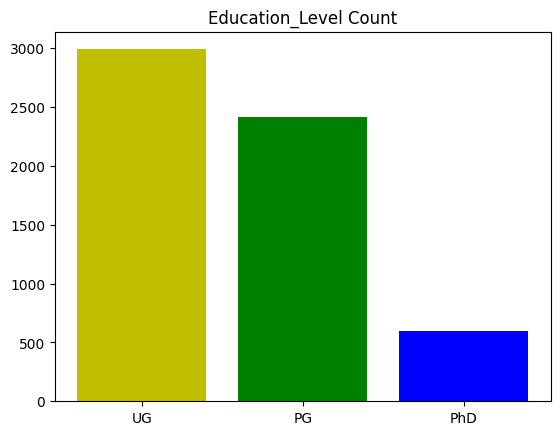

In [438]:
plt.bar(df1.index,df1.values,color=['y','g','b'])
plt.title("Education_Level Count")

In [439]:
df1=df['Interest_Domain'].value_counts()
df1

Interest_Domain
AI                 2017
Web Development    1993
Data Science       1990
Name: count, dtype: int64

Text(0.5, 1.0, 'Interest Domian')

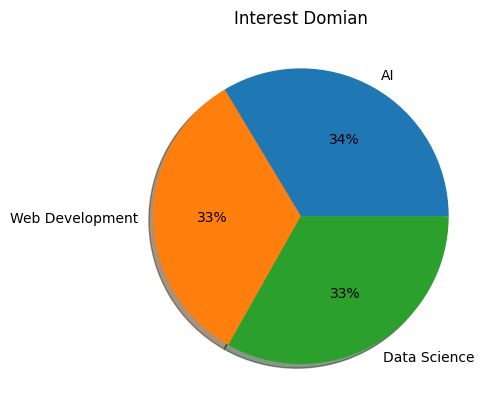

In [440]:
lab=["AI", "Web Development", "Data Science"]
plt.pie(df1,labels=lab,autopct='%2.f%%',shadow=True)
plt.title('Interest Domian')


<Axes: xlabel='Skill_Level', ylabel='count'>

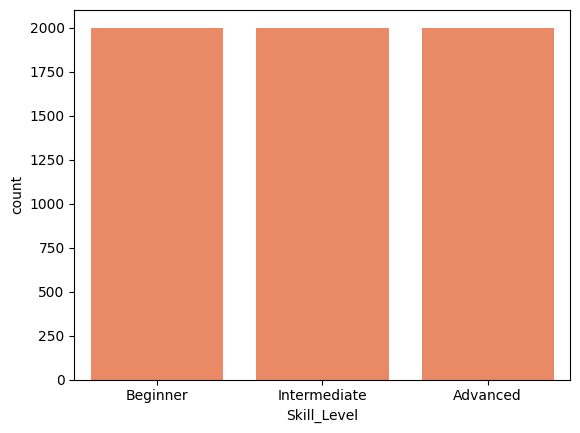

In [441]:
sns.countplot(x=df['Skill_Level'],color='coral')

In [442]:
x=df.drop("Skill_Level", axis=1)
x


,Age,Experience_Years,Average_Score,Time_Spent_Hours,Completed_Courses,Education_Level,Interest_Domain
0,56,1.0,56,4,3.0,UG,Web Development
1,46,0.3,43,7,3.0,PG,Web Development
2,32,0.8,68,5,1.0,PG,Data Science
3,25,1.1,52,8,2.0,PG,Web Development
4,38,0.2,43,4,0.0,UG,AI
...,...,...,...,...,...,...,...
5995,32,7.9,79,38,6.0,UG,AI
5996,48,3.8,78,15,12.0,PG,AI
5997,24,7.8,76,21,10.0,UG,AI
5998,47,5.3,95,37,10.0,PG,AI


In [443]:
y=df["Skill_Level"].values
y

array(['Beginner', 'Beginner', 'Beginner', ..., 'Advanced', 'Advanced',
       'Advanced'], shape=(6000,), dtype=object)

<Axes: ylabel='Age'>

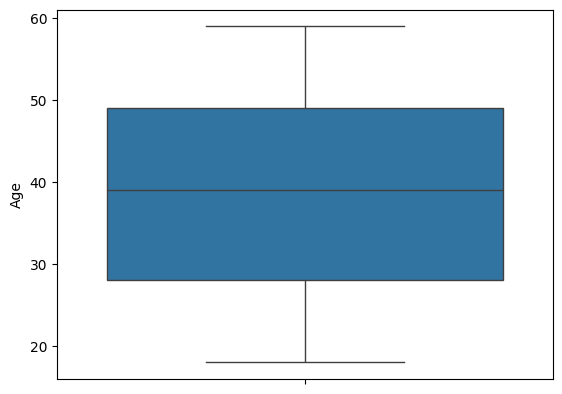

In [444]:
#Outliers in Age

sns.boxplot(y='Age',data=df)

In [445]:

Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR)))
outliers.sum()


np.int64(0)

<Axes: ylabel='Experience_Years'>

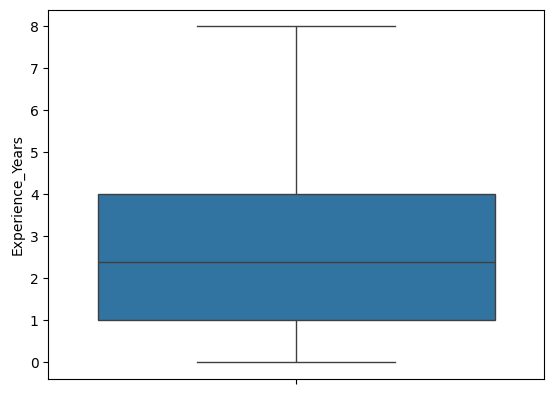

In [446]:
# Outliers in Experience year

sns.boxplot(y='Experience_Years',data=df)

<Axes: ylabel='Average_Score'>

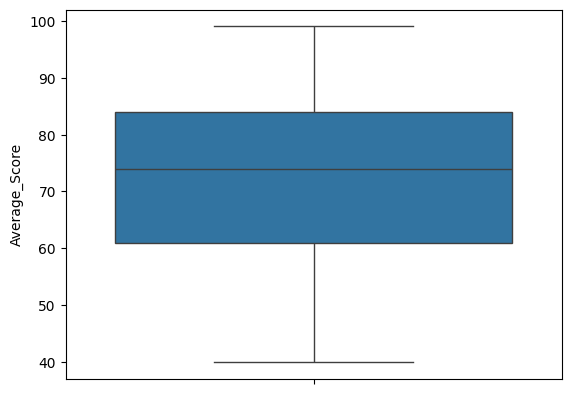

In [447]:
# Outliers in Average_Score

sns.boxplot(y='Average_Score',data=df)

<Axes: ylabel='Time_Spent_Hours'>

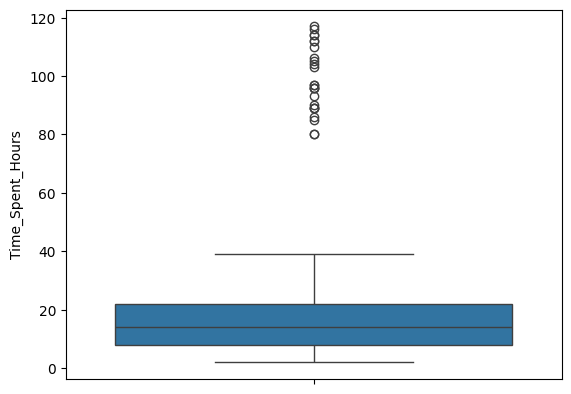

In [448]:
# Outliers in Time_Spent_Hours

sns.boxplot(y='Time_Spent_Hours',data=df)

In [449]:
Q1 = df["Time_Spent_Hours"].quantile(0.25)
Q3 = df["Time_Spent_Hours"].quantile(0.75)
IQR = Q3 - Q1

df = df[(df["Time_Spent_Hours"] >= Q1 - 1.5 * IQR) & (df["Time_Spent_Hours"] <= Q3 + 1.5 * IQR)]


<Axes: ylabel='Time_Spent_Hours'>

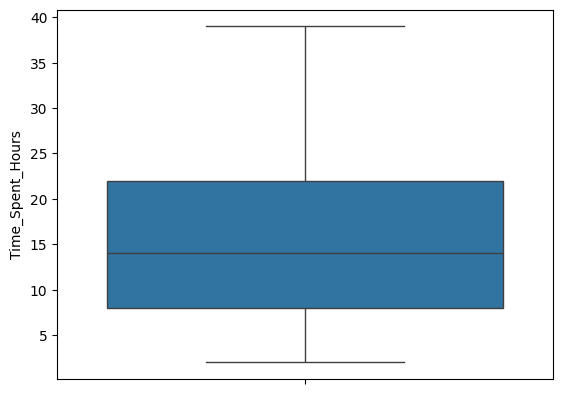

In [450]:
# Time_Spent_Hours

sns.boxplot(y='Time_Spent_Hours',data=df)

<Axes: ylabel='Completed_Courses'>

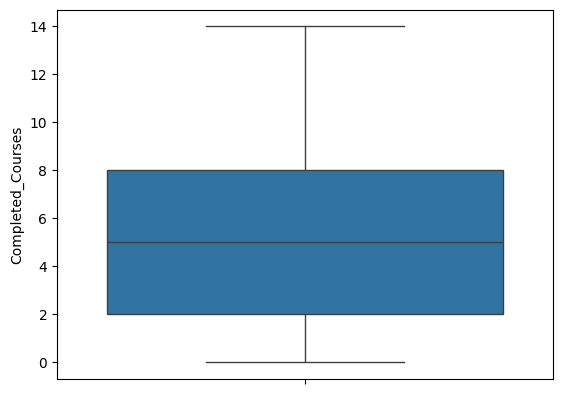

In [451]:
# Outliers in Completed_Courses

sns.boxplot(y='Completed_Courses',data=df)

In [452]:
# Encoding

from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
x['Education_Level']=Encoder.fit_transform(x['Education_Level'])
x['Interest_Domain']=Encoder.fit_transform(x['Interest_Domain'])
x

,Age,Experience_Years,Average_Score,Time_Spent_Hours,Completed_Courses,Education_Level,Interest_Domain
0,56,1.0,56,4,3.0,2,2
1,46,0.3,43,7,3.0,0,2
2,32,0.8,68,5,1.0,0,1
3,25,1.1,52,8,2.0,0,2
4,38,0.2,43,4,0.0,2,0
...,...,...,...,...,...,...,...
5995,32,7.9,79,38,6.0,2,0
5996,48,3.8,78,15,12.0,0,0
5997,24,7.8,76,21,10.0,2,0
5998,47,5.3,95,37,10.0,0,0


In [453]:
# train_test_split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)
x_train

,Age,Experience_Years,Average_Score,Time_Spent_Hours,Completed_Courses,Education_Level,Interest_Domain
4831,35,3.4,82,35,14.0,2,2
4646,37,7.2,77,12,6.0,2,0
2154,50,3.6,71,22,6.0,2,1
1581,44,0.4,46,11,2.0,2,1
135,54,1.3,66,6,3.0,2,1
...,...,...,...,...,...,...,...
4931,38,7.4,90,13,8.0,2,2
3264,45,1.6,80,19,5.0,2,1
1653,58,0.5,69,3,3.0,0,0
2607,29,1.4,66,13,6.0,0,1


In [454]:
x_test

,Age,Experience_Years,Average_Score,Time_Spent_Hours,Completed_Courses,Education_Level,Interest_Domain
4320,59,4.7,78,15,14.0,0,1
2006,57,3.0,64,17,5.0,2,2
5689,42,6.1,85,12,10.0,1,0
472,25,0.7,69,6,3.0,1,1
1370,42,0.3,66,2,1.0,2,1
...,...,...,...,...,...,...,...
1698,25,0.4,57,8,2.0,0,1
976,44,0.8,50,5,1.0,1,2
2294,28,2.1,77,14,2.0,1,1
892,20,1.3,45,5,1.0,0,1


In [455]:
# Scaling

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train,y_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [456]:
x_train

array([[-0.27564307,  0.27799465,  0.66892868, ...,  2.16534534,
         0.9545666 ,  1.23819489],
       [-0.10925892,  2.04142653,  0.34407837, ...,  0.16276893,
         0.9545666 , -1.21194341],
       [ 0.97223802,  0.37080685, -0.04574202, ...,  0.16276893,
         0.9545666 ,  0.01312574],
       ...,
       [ 1.6377746 , -1.06778231, -0.17568215, ..., -0.58819722,
        -1.16781547, -1.21194341],
       [-0.7747955 , -0.65012739, -0.37059234, ...,  0.16276893,
        -1.16781547,  0.01312574],
       [ 1.6377746 ,  0.13877634,  0.40904843, ..., -0.58819722,
        -1.16781547,  1.23819489]], shape=(4200, 7))

In [457]:
x_test

array([[ 1.72096668,  0.88127398,  0.40904843, ...,  2.16534534,
        -1.16781547,  0.01312574],
       [ 1.55458253,  0.09237024, -0.50053247, ..., -0.08755312,
         0.9545666 ,  1.23819489],
       [ 0.30670144,  1.5309594 ,  0.86383888, ...,  1.16405713,
        -0.10662443, -1.21194341],
       ...,
       [-0.85798758, -0.32528468,  0.34407837, ..., -0.83851927,
        -0.10662443,  0.01312574],
       [-1.52352416, -0.69653349, -1.73496368, ..., -1.08884132,
        -1.16781547,  0.01312574],
       [ 0.55627766,  1.90220822,  0.2791083 , ...,  1.16405713,
         0.9545666 , -1.21194341]], shape=(1800, 7))

In [458]:
y_train

array(['Advanced', 'Advanced', 'Intermediate', ..., 'Beginner',
       'Intermediate', 'Intermediate'], shape=(4200,), dtype=object)

In [459]:
# Model Creation

from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=150,max_depth=10,random_state=42)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
y_pred

array(['Advanced', 'Intermediate', 'Advanced', ..., 'Intermediate',
       'Beginner', 'Advanced'], shape=(1800,), dtype=object)

In [460]:
y_test

array(['Advanced', 'Intermediate', 'Advanced', ..., 'Intermediate',
       'Beginner', 'Advanced'], shape=(1800,), dtype=object)

In [461]:
# Performance Evaluation

from sklearn.metrics import accuracy_score,classification_report
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 99.27777777777777

Classification Report:
               precision    recall  f1-score   support

    Advanced       1.00      0.98      0.99       606
    Beginner       1.00      1.00      1.00       604
Intermediate       0.98      0.99      0.99       590

    accuracy                           0.99      1800
   macro avg       0.99      0.99      0.99      1800
weighted avg       0.99      0.99      0.99      1800



In [462]:
# Recommended Courses

def recommend_courses(level):
    if level == "Beginner":
        return [
            "Python Basics",
            "Introduction to Programming",
            "Math for Machine Learning"
        ]
    elif level == "Intermediate":
        return [
            "Machine Learning Algorithms",
            "Data Analysis with Pandas",
            "SQL for Data Science"
        ]
    else:
        return [
            "Deep Learning",
            "MLOps Fundamentals",
            "Advanced NLP / Computer Vision"
        ]


In [463]:
sample1=np.array([[20, 0.0, 45, 3, 0, 0, 0]])
sample1_scaled=scaler.transform(sample1)
y_pred=model.predict(sample1_scaled)
y_pred
print("Predicted Level:", y_pred)
print("Recommended Courses:", recommend_courses(y_pred))

Predicted Level: ['Beginner']
Recommended Courses: ['Python Basics', 'Introduction to Programming', 'Math for Machine Learning']


c:\Users\nandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [464]:
sample2=np.array([[26, 1.8, 70, 12, 4, 1, 1]])
sample2_scaled=scaler.transform(sample2)
y_pred=model.predict(sample2_scaled)
y_pred
print("Predicted Level:", y_pred)
print("Recommended Courses:", recommend_courses(y_pred))

Predicted Level: ['Intermediate']
Recommended Courses: ['Machine Learning Algorithms', 'Data Analysis with Pandas', 'SQL for Data Science']


c:\Users\nandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [465]:
sample3=np.array([[32, 5.5, 92, 25, 12, 2, 0]])
sample3_scaled=scaler.transform(sample3)
y_pred=model.predict(sample3_scaled)
y_pred
print("Predicted Level:", y_pred)
print("Recommended Courses:", recommend_courses(y_pred))

Predicted Level: ['Advanced']
Recommended Courses: ['Deep Learning', 'MLOps Fundamentals', 'Advanced NLP / Computer Vision']


c:\Users\nandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [466]:
import pickle

pickle.dump(model, open("model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))


In [467]:
import os
os.listdir()


['app.py', 'model.ipynb', 'model.pkl', 'scaler.pkl']